<a href="https://colab.research.google.com/github/miguelangel17z/Practica1-Estructura-de-datos-y-algoritmos/blob/main/informe_parcial1_ST0247.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Informe Parcial 1 Estructuras de Datos y Algoritmos 2**

#### **Profesor:** Carlos Álvarez Henao

#### **Integrantes:**

*   Miguel Ángel Garcia Osorio.
*   Dorian Alejandro Guisao Ospina.


#### **INDICE:**
- [Explicación de la implemetanción](#explicacion-de-la-implemetancion)


- [Complejidad temporal Big-Oh en algoritmos de ordenamiento:](#complejidad-temporal-big-oh-en-algoritmos-de-ordenamiento:)


- [Preguntas de análisis algoritmos de ordenamientos:](#preguntas-de-análisis-algoritmos-de-ordenamientos:)


- [Complejidad temporal Big-Oh en algoritmos de búsqueda:](#complejidad-temporal-big-oh-en-algoritmos-de-busqueda:)


- [Preguntas de análisis algoritmos de búsqueda:](#preguntas-de-análisis-algoritmos-de-busqueda:)


- [Grafícas:](#graficas:)

#**Explicación de la impementación:**
La implementacion se baso en tomar algoritmos de ordenamiento *(Bubble sort, Selection sort, Shell sort, Quick sort y Merge sort)* y algoritmos de busqueda *(Binary search y Lineal search)*, Y medir el tiempo que tarda en procesarse completamente el algoritmo con arreglos llenos de datos aleatorios con distintos tamaños de entrada.

El programa cuenta con 4 clases, dos de ellas destinadas a los algoritmos destinados para el test *(SearchAlgorithms.java y sortAlgorithms.java)* y otras dos clases para hacer el test y guardar los resultados en un archivo.

####**TestClass.java:**
Clase destinada para el test de los algoritmos, la clase tiene unos metodos principales como lo es, ``createTimeListSortAlgorithm() `` y ``createTimeListAuxSortAlgorithm() ``. Que se basa en ejecutar los algoritmos de ordenamiento con distintas longitudes de entre 100 y 100 millon para algunos algoritmos.
```java
    void createTimeListSortAlgorithm() {
        algorithmTimes.clear(); //Limpiamos la lista para que no se mezcle con los datos de los algoritmos de busqueda
        createTimeListAuxSortAlgorithm("Bubble Sort");
        createTimeListAuxSortAlgorithm("Selection Sort");
        createTimeListAuxSortAlgorithm("Shell Sort");
        createTimeListAuxSortAlgorithm("Quick Sort");
        createTimeListAuxSortAlgorithm("Merge Sort");
    }

         * Funcion para ejecutar algun algoritmo de busqueda, esta se encarga de ejecutarlo en listas de longitud desde 100 hasta 100 millones, mulplicandose
     * de 10 en 10
     *
     * @param algorithm string que es el nombre del algoritmo a usar
     */
    private void createTimeListAuxSortAlgorithm(String algorithm) {
        sortAlgorithms algorithmObject = new sortAlgorithms();
        int n = 10;
        int i = 1;
        String[] staticAlgorithmTimes = new String[8]; // string[] estatico que guardara los datos de cada algoritmo y luego se agregaran al arraylist algorithmTimes
        staticAlgorithmTimes[0] = algorithm;
        while (n < 100000000 && i < 8) {
            n *= 10;
            //bubble sort e selection sort estan solo hasta 100 mil por motivos de tiempo para probar el codigo, en el test se toman datos hata 1 millon-
            if (n == 100000000 && algorithm.equals("Quick Sort") || n == 1000000 && algorithm.equals("Bubble Sort") || n == 1000000 && algorithm.equals("Selection Sort") || n == 100000000 && algorithm.equals("Shell Sort") ) { // condicional para evitar que el quick sort o el bubble sort haga 100 millones,
                // debido a que en este caso el quick sort no soporta cuando son 100 millones, solo hasta 10 millones. Y el bubble sort y Selection sort tarda demasiado para hacer la prueba.
                //Tambien el shell sort se tiene que poner un limite o sino tarda demasiado
                break;
            }
            int[] array = randomList(n); // se crea una lista con datos aleatorio
            double time = timer(array, algorithmObject, algorithm);
            // se llama la funcion timer para tomar el tiempo que tarda en ejecutarse y se guarda
            staticAlgorithmTimes[i] = String.valueOf(time);
            i++;
        }
        algorithmTimes.add(staticAlgorithmTimes);
    }
  ```
Algo importante de mencionar es que, todos los algoritmos se le hicieron pruebas hasta de 1 millon de elementos. Sin embargo, inicialmente se tenia preparado que todos fueran hasta 100 millones, pero luego de correr el Bubble sort por mas de 3 horas y una pequeña investigación, nos dimos cuenta que puede tardar dias en procesar ese volumen, lo mismo paso con el Selection sort y Shell sort. El unico que pudimos procesar con un millon de elementos en un tiempo razonablemente rapido fue el merge sort, ya que debido a ciertos problemas de implementacion el quick sort solo soportaba hasta 10 millones de elementos.

Para los algoritmos de busqueda, la funcion es bastante parecida solo que se le agrega el parametro del numero a buscar y un booleano `worstCase` , ya que decidimos implementar tambien un test donde se llenara el arreglo con numeros ordenados de manera ascendete y asi buscar exactamente el ultimo elemento, en vez de uno aleatorio
####**CSVwriter.java:**
Esta clase se basa en escribir en un archivo tipo csv con los resultados de cada algoritmo, su implementacion es bastante sencilla y lo unico que hace es ejecutar las funciones de TestClass.java y guardarlas en los distintos archivos.

**Fragmento de codigo de la clase:**
```java

/**
 * Clase para crear y escribir sobre el archivo .cvs los datos dados por la clase TestClass
 */
public class CsvWriter {

    /**
     * Funcion donde se creara el archivo para los algoritmos de ordenamiento
     */
    void writeCsvSortAlgorithm() {
        TestClass testObject = new TestClass();
        String archivo = "Sort Algorithms Time Data.csv"; // nombre del archivo
        System.out.println("\n-Creando archivo con datos de algoritmos de ordenamiento");
        try (BufferedWriter writer = new BufferedWriter(new FileWriter(archivo))) { // creamos un objeto de tipo BufferedWriter para escribir en el archivo
            writer.write("Algorithm,100,1.000,10.000,100.000,1.000.000,10.000.000,100.000.000");// asignamos nombres para las columnas
            writer.newLine();
            testObject.createTimeListSortAlgorithm(); // Llamamos la funcion donde se ejecutaran todos los algoritmos y se guardara su informacion
            //en el arraylist algorithmTimes
            for (String[] row : TestClass.algorithmTimes) {// escribimos los datos del arraylist en el archivo
                writer.write(String.join(",", row));
                writer.newLine();
            }
            System.out.println("Archivo "+archivo +" fue creado con exito");
        } catch (IOException e) {//para manejar errores
            throw new RuntimeException("Error al escribir el archivo", e);
        }
    }

```
Por ultimo, en el main se hizo un ouput para hacer una pequeña demostracion del codigo de algoritmos de busqueda y dar una pequeña descripcion.

**Ejemplo de la consola una vez ejecutado el codigo:**

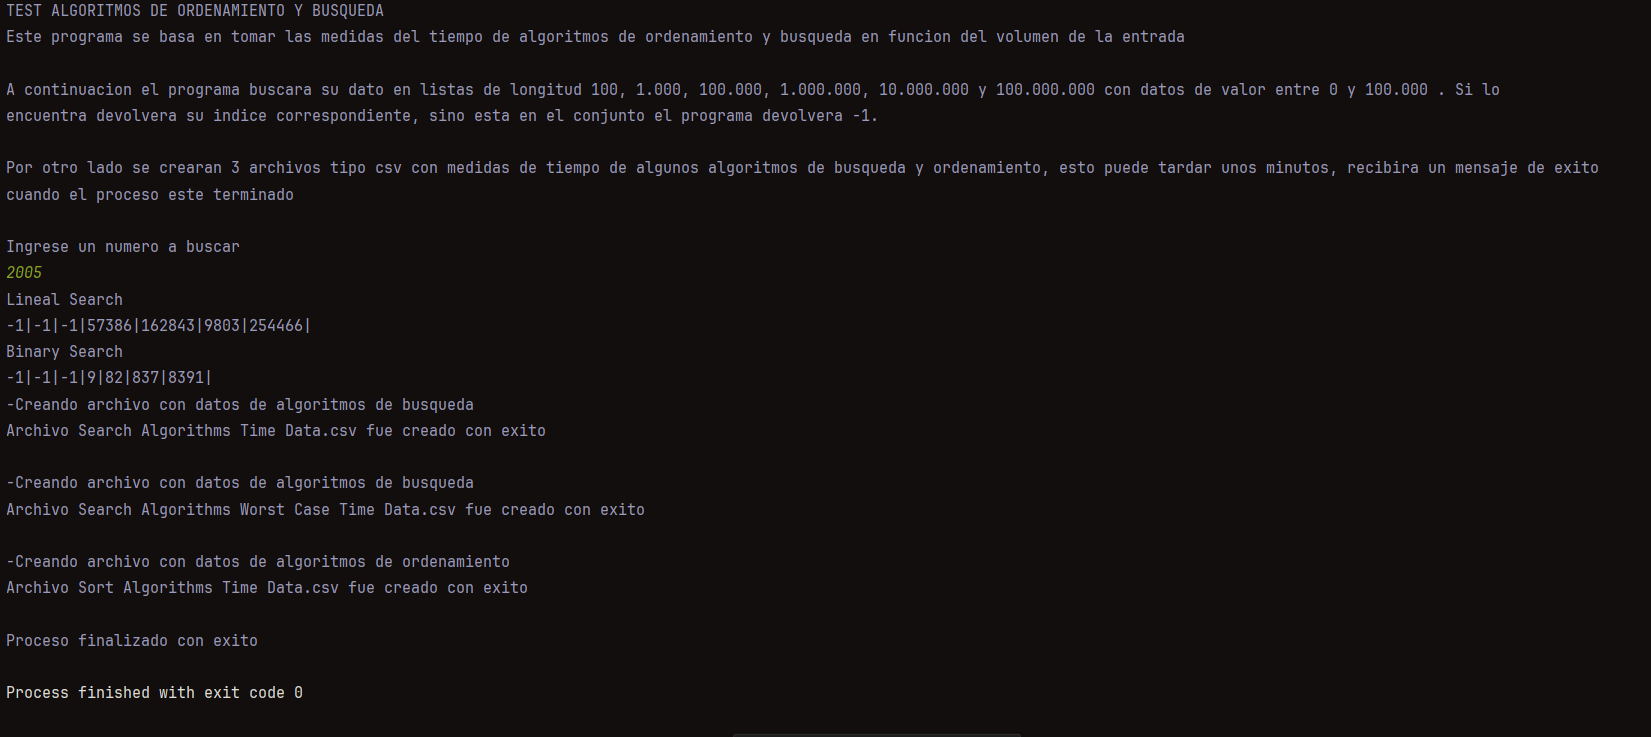



  







# **Complejidad temporal *Big-Oh* en algoritmos de ordenamiento:**

#### 1) **Selection Sort:**

```Java
1.  int[] selectionSort(int[] array) {
2.      for (int i = 0; i < array.length; i++) {
3.          int minimo = i;
4.          for (int j = i + 1; j < array.length; j++) {
5.              if (array[j] < array[minimo]) {
6.                  minimo = j;
7.              }
8.          }
9.          int aux = array[i];
10.         array[i] = array[minimo];
11.         array[minimo] = aux;
12.     }
13.     return array;
14. }
```

Para calcular la complejidad algoritmica de este algoritmo primero debemos notar que tiene dos ciclos *for*, uno anidado dentro del otro, por eso calcularemos la complejidad temporal de cada ciclo para después mediante la regla del producto calcular la complejidad total. Para calcular ambas complejidades usamos la siguiente fórmula para el cálculo de la complejidad de ciclos *for* *(la llamaremos $F1$)*:

$$ T(n) = \sum_{i=1}^{Final-Inicio+1} T_{1,i}(n) + 2 \cdot (Final - Inicio + 1) \cdot c $$

Las partes de la fórmula son:

1. $T_{1,i}(n)$, o complejidad del cuerpo del ciclo.
2. ($2 \cdot (Final - Inicio + 1) \cdot c$), o número de iteraciones del ciclo.

Ahora, en el primer ciclo (línea 2) notamos que $inicio  = 0$ y que $final = n- 1 $ (n = tamaño del arreglo) porque temos que recorrer el arreglo en toda su longitud, luego los condicionales y asignaciones dentro del arreglo tienen una complejidad total de $O(1)$ y al ciclo le sigue una asignacion simple $O(1)$ y un *swap* con complejidad $O(1)$ tambien, de este primer ciclo tenemos:

* $Final−Inicio+1 = (n-1)-0+1 = n$     
* $T_{1,i}(n) = O(1)$

Por $F1$ la complejidad de este primer ciclo es $O(n)$, ahora veamos el segundo ciclo.

En este segundo ciclo volvemos a recorrer todo el arreglo, la complejidad de los condicionales y asignaciones dentro del arreglo tambien tienen una complejidad de $O(1)$, el cuerpo del arreglo tambien tiene complejidad $O(1)$ esto nos da lo siguiente:

* $Final−Inicio+1 = (n)-(0+1) = n-1$     
* $T_{1,i}(n) = O(1)$

Por $F1$ la complejidad de este segundo ciclo es  tambien $O(n)$. Finalmente, aplicando regla del produco $T(n)$ es:

$T(n) = O(n) ⋅ O(n) =  O(n^2) $









#### 2) **Bubble Sort:**

```Java
1.  int[] bubbleSort(int[] array) {
2.      for (int i = 1; i < array.length; i++) {
3.          for (int j = 0; j < array.length - i; j++) {
4.              if (array[j] > array[j + 1]) {
5.                  int aux = array[j + 1];
6.                  array[j + 1] = array[j];
7.                  array[j] = aux;
8.              }
9.          }
10.     }
11.     return array;
12. }
```

En esta algoritmo estamos en el mismo caso que en el anterior, es decir, tenemos dos ciclos *for* anidados, pero no podemos usar la fórmula anterior ya que el ciclo interno es dependiente del ciclo externo asi que debemos la siguiente fórmula: $ T(n) = k + T_{1,i}(n) $ donde $k$ es el número de iteraciones.

El primer ciclo se ejecuta $n-1$ veces ya que su función es recorrer todo el arreglo. El segundo ciclo se ejecuta $n-i$ veces en cada iteración del ciclo externo. Por ejemplo, la primera ($i=1$) vez el ciclo interno se ejecuta $n-1$ veces, la segunda $n-2$ veces, asi hasta $n-1$ iteraciones del ciclo externo que es cuando el ciclo externo se deja de ejecutar. También se observa un *swap* en el cuerpo ciclo interno con una complejidad de $O(1)$.

Sabiendo esto, podemos darnos cuenta de que el ciclo sigue un patron en las iteraciones:
$k = (n−1)+(n−2)+(n−3)+⋯+1$, esto lo podemos expresar con la siguiente sumatoria:

$$k =\sum_{i=1}^{n-1}(n-i) = \sum_{i=1}^{n-1} i = \frac {n(n-1)}{2} $$

Finalmente, conociendo $k$ y $T_{1,i}(n)$, por la fórmula y la regla del producto:

$$T(n) = O(1) ⋅ \frac {n(n-1)}{2} = O(1)⋅ (\frac {n^2}{2}+ (-\frac {n}{2})) = O(n^2)$$

Nota: este cálculo se realizó con ayuda de DeepSeek.





#### 3) **Shell Sort:**

```Java
1.  int[] shellSort(int[] array) {
2.      int gap = array.length / 2;
3.      while (gap > 0) {
4.          for (int i = gap; i < array.length; i++) {
5.              int current = array[i];
6.              int j = i;
7.              while (j >= gap && array[j - gap] > current) {
8.                  array[j] = array[j - gap];
9.                  j -= gap;
10.             }
11.             array[j] = current;
12.         }
13.         gap = gap / 2;
14.     }
15.     return array;
16. }
```

Para calcular la complejidad de este algoritmo vamos a usar la fórmula $F1$ y añadiremos la siguiente fórmula que llamaremos $F2$ y es la fórmula para la complejidad de ciclos *while* :

$$ T(n) = \sum_{i=1}^{k-1} T_{2,i}(n) + k \cdot T_{\text{cond}}(n)$$

1. Primero calculemos la complejidad del primer while:

  * $T_{1,i}(n) = O(1)$
  * $T_{\text{cond}}(n)= O(1)$, ambas complejidades son $O(1)$, ya que solo tienen asignaciones y comparaciones simples.
  * $k = n log(n)$, veamos el proceso detallado del calculo de $k$.

  para calcular $k$, primero debemos notar que la cantidad de iteraciones del primer while se va decrementando a medida que pasa cada iteración. Por ejemplo, en la primera iteración hay $n$ iteraciones, pero después las iteraciones disminuyen igual que nuestro *gap* (linea 2 y 13) esto se decrementara hasta 1 que es cuando ya no se comple la condicion de (*gap* > 0), asi obtenemos el siguiente patron en las iteraciones: $n, \frac{n}{2}, \frac{n}{4}, \frac{n}{8},\frac{n}{16} \ldots, 1$.

  Para hallar $k$ debemos resolver la siguiente ecuación: $\frac{n}{2^k}=1$. Despejando para $k$ tenemos $n=2^k$, luego $\log(n)=\log_2(k)$, sabiendo esto aplicamos $F2$ y tenemos que la compeljidad del primer ciclo while es $ n \log(n)$ (*Siendo sincero, no se de donde sale esa $n$ que multiplica al logaritmo, la pongo porque sé que asi debe ser*).

2. Calculemos la complejidad del *for* que esta dentro del primer *while*:

  La complejidad de todos los elementos de este ciclo es de $O(1)$, excepto por su cantidad de iteraciones, $inicio = gap$ y $final = n-1$ por lo que calculando la cantidad de iteraciones tenemos que $k = n-1-gap+1 = n-gap$

3. Calculemos la complejidad del segundo *while*:

  *En* este while su cuerpo y su condición de parada tiene una complejidad de $O(1)$ ambas y su $k= \frac{n}{gap}$ ya que en el peor de los casos esto es casi igual a $n$

4. Aplicar regla del producto para calcular la complejidad total:

  $T(n) = O(n \log (n)) \cdot n-gap \cdot \frac{n}{gap} = O(n \log (n)) \cdot n^2) $

#### 4) **Quick Sort:**

```Java
1.  private void swap(int[] arr, int i, int j) {  
2.  }  

3.  private int partitioning(int[] arr, int low, int high) {  
4.  }  

5.  void quickSort(int[] arr, int low, int high) {  
6.      if (low < high) {  
7.          int j = partitioning(arr, low, high);  
8.          quickSort(arr, low, j - 1);  
9.          quickSort(arr, j + 1, high);  
10.     }  
11. }
```

Nota: El código de arriba es un código sin el cuerpo de las funciones *swap* y *partitioning*, para ahorrar espacio.

La función *swap* es llamada en *partitioning*, pero la complejidad de *swap* es $O(1)$ por lo que no afecta la complejidad de *partitioning*. La función de *partitioning* es recorrer nuestro arreglo desde ambos extremos (low, high) de nuestro arreglo hasta que se cruzen, la complejidad Big-Oh de *partitioning* es de $O(n)$ porque en el peor caso deberemos recorrer todo el arreglo para que low y high se cruzen (omitimos los calculos detallados en esta parte ya que lo verdaderamente importante de este algoritmo es la recursión).

El peor caso ocurre cuando el pivote siempre es el elemento más pequeño o más grande del arreglo, lo que resulta en una partición desbalanceada. Por ejemplo, si el arreglo ya está ordenado y el pivote es el primer elemento, en cada llamada recursiva el arreglo se divide en un subarreglo de tamaño $n − 1$ y otro de tamaño $0$. Esto hace que la profundidad de la recursión sea  $n$, ya que el tamaño del arreglo solo se reduce en 1 en cada llamada. Además, en cada nivel de recursión se realiza una partición que toma $O(n)$. Por lo tanto, multiplicando el trabajo en cada nivel por la profundidad de la recursión, la complejidad total en el peor caso es $T(n)=O(n)×n=O(n^2)$.




#### 5) **Merge Sort:**

```Java
1.  private void merge(int[] arr, int low, int mid, int high) {  
2.  }  

3.  void mergeSort(int[] arr, int low, int high) {  
4.      if (low < high) {  
5.          int mid = (low + high) / 2;  
6.          mergeSort(arr, low, mid);  
7.          mergeSort(arr, mid + 1, high);  
8.          merge(arr, low, mid, high);  
9.      }  
10. }  
```

Merge Sort divide el arreglo en dos mitades recursivamente hasta que cada subarreglo tiene un solo elemento. Luego, combina los subarreglos ordenados con la función merge, cuya complejidad es   $O(n)$. La profundidad de la recursión es $\log_2(n)$, ya que el tamaño del arreglo se reduce a la mitad en cada nivel. Como en cada nivel se realiza una combinación de $O(n)$, la complejidad total de Merge Sort es $O(n \log(n))$.

## **Preguntas de análisis algoritmos de ordenamientos**

1. ¿Cómo varía el tiempo de ejecución a medida que aumenta el tamaño del arreglo?
  * El tiempo de ejecución varía dependiendo de la función que defina la complejidad del algoritmo (en nuestro caso Big-Oh). Por ejemplo, el tiempo de ejecución del bubble sort aumenta con el cuadrado de la entrada ($O(n^2)$). En esta tabla esta el resumen de como cambia el tiempo a medida que aumenta el tamaño de ka entrada de los algoritmos que realizamos o se pueden ver las gráficas al final:

            | Algoritmo      | Complejidad \( O(n) \) |
            |----------------|----------------------|
            | Bubble Sort    | \( O(n^2) \)         |
            | Selection Sort | \( O(n^2) \)         |
            | Shell Sort     | \$( O((n \log(n)) n^2) \)$  |
            | Quick Sort     | \( O(n^2) \)  |
            | Merge Sort     | \( O(n log n) \)    |



2. Explica la complejidad Big-O de cada algoritmo.
  * La respuesta esta arriba.
3. ¿Por qué algunos métodos son significativamente más rápidos que otros?
  * Algunos algoritmos son significativamente más rápidos que otros, ya que implementan técnicas como "divide y vencerás". En este caso concreto, al dividir el problema en subproblemas más pequeños, nos ahorramos una gran cantidad de recursos porque no tenemos que realizar todo el proceso. Otros simplemente son versiones mejoradas de algoritmos ya existentes como lo es el shell sort al selection sort.

    Un gran ejemplo de esto son los algoritmos de búsqueda. En la búsqueda secuencial, casi que dependemos de la suerte para que el dato a encontrar no esté en los últimos índices del arreglo, es decir, no es una solución óptima en la mayoría de los casos.


# **Complejidad temporal *Big-Oh* en algoritmos de búsqueda:**


#### **1) Busqueda Secuencial:**

```Java
1.  private static int linearSearch(int arr[], int n, int num) {
2.      for (int i = 0; i < n; i++) {
3.          if (arr[i] == num) {
4.              return i;
5.          }
6.      }
7.      return -1;
8.  }
```


Usando la siguiente ecuación para calcular la complejidad:

$$ T(n) = \sum_{i=1}^{Final-Inicio+1} T_{1,i}(n) + 2 \cdot (Final - Inicio + 1) \cdot c $$

De la segunda línea podemos ver que nuestro incio es $I = 0$ y nuestro final es $F = n-1$ (ya que i < n). Luego, las operaciones de comparación y asignación dentro del ciclo tienen una complejidad $O(1)$. Finalmente, el cuerpo del ciclo, es decir, en las líneas 3 y 4 tenemos una comparacíon y un retorno, ambos con complejidad $O(1)$. Ahora, de esto tenemos lo siguiente:

* $Final−Inicio+1 = (n-1)-(0+1) = n$     
* $T_{1,i}(n) = O(1)$ (cuerpo del ciclo)
* $c = O(1)$ (constante)

Por lo que $T(n)$ es igual a:

$$ T(n) = \sum_{i=1}^{n} O(1) + 2 \cdot (n) \cdot O(1) $$ desglosando esto en dos sumatorias:

1. $ \sum_{i=1}^{n} O(1) = n \cdot O(1) = O(n) $
2. $ \sum_{i=1}^{n} 2 \cdot (n) \cdot O(1) = 2n \cdot O(1) = O(n) $

Finalmete sumando estos dos resultados tenemos que:  $T(n) = O(n) + O(n) = O(n)$

---







#### 2) **Busque Binaria:**

```Java
1.  private static boolean binarySearch(int arr[], int n, int num) {
2.      int low = 0;
3.      int high = n - 1;
4.  
5.      while (low <= high) {
6.          int mid = ((high - low) / 2) + low;          
8.          if (arr[mid] == num) {
9.              return true;
10.         }
11.         else if (num < arr[mid]) {
12.             high = mid - 1;
13.         }
14.         else {
15.             low = mid + 1;
16.         }
17.     }
18.     return false;
19. }

```


Al inicio de nuestro algoritmo tenemos dos asignaciones, con una complejidad total de $O(1)$. Luego viene el ciclo while, cuya condición de parada tiene una complejidad de $O(1)$. El cuerpo del ciclo también tiene una complejidad de  $O(1)$, porque solo realizamos asignaciones simples y comparaciones con una complejidad de $O(1)$. Así, la complejidad del cuerpo de nuestro ciclo es $O(1)$. Para proceder con el calculo de la complejidad del algoritmo contamos con la siguiente fórmula:

$$T(n) = \sum_{i=1}^{k-1} T_{2,i}(n) + k \cdot T_{\text{cond}}(n)$$

$k$ es el número de iteraciones para reducir el espacio de búsqueda a _1_. En cada iteración, se calcula el punto medio del arreglo. Si el dato buscado está en el medio, se encuentra (mejor caso). Si no, el espacio de búsqueda se reduce a la mitad superior (dato mayor) o inferior (dato menor), repitiéndose hasta encontrar el dato o agotar el espacio. Esto refleja un patrón de división del espacio en cada iteración.

1. Al reducir el espacio de busqueda a la mitad con cada iteración el ciclo tiene este comportamiento $n$, $\frac{n}{2}$, $\frac{n}{8}$ y, como se meciona arriba esto sigue hasta llegar a _1_, por lo que las iteraciones del ciclo siguen la siguiente relacion: $n, \frac{n}{2}, \frac{n}{4}, \frac{n}{8},\frac{n}{16} \ldots, 1$.
2. Para hallar $k$ debemos resolver la siguiente ecuación: $\frac{n}{2^k}=1$. Despejando para $k$ tenemos $n=2^k$, luego $\log(n)=\log_2(k)$

Para terminar, contamos con esta información para calcular $T(n)$:
* $T_{2,i}(n) = O(1)$ (cuerpo de la función)
* $T_{\text{cond}}(n) = O(1)$ (condicón de parada)
* $k = \log(n)$

Aplicando la fórmula tenemos que $T(n) = O(\log(n))$



## **Preguntas de análisis algoritmos de búsqueda:**

1. Explica la complejidad de cada método de búsqueda en términos de Big-O.
    * Arriba esta la respuesta.
2. ¿En qué casos es preferible la búsqueda secuencial sobre la binaria?
    * La búsqueda secuencia es preferible a la búsqueda binaria principalmente en dos casos, el primero es cuando sabemos que el dato que vamos a buscar esta en los indices inferiores del arreglo y el segundo es cuando no tenemos las capacidades técnicas, físicas, mentales, etc. Para ordenar nuestro arreglo, por lo que la única solución seria la busqueda secuencial.
3. ¿Cómo cambia el rendimiento al aumentar el tamaño de los datos?
    * El rendimiento de ambos algoritmos cambia en función de la complejidad de nuestro algoritmos. En el caso, de la búsqueda secuencial como se ve arriba su complejidad es de $O(n)$, lo que nos índica que en el peor caso deberemos recorrer todo el arreglo para encontrar un dato. Con la búsqueda binaria tenemos una situción completamente diferente ya que su peor caso es $O(\log(n))$ por lo que a medida que aumentemos el número de datos el tiempo y los recursos requeridos para hallar un dato no seran tan exagerados como con la búsqueda secuencial.

# **Gráficas:**
Con los archivos .csv creados, se hicieron grafícas en excel para representar el tiempo en funcion del numero de elementos. Dado el rango amplio de valores, se aplicó una escala logarítmica de base 10 en ambos ejes para linealizar la gráfica. Esto significa que los valores mostrados en el eje Y deben interpretarse como potencias de 10.

Como se explico anteriormente, las pruebas son de 100, 1.000, 10.000, 100.000 y 1.000.000 de elementos para todos los algoritmos de ordenamiento, y para shell sort y Quick sort los datos van hasta 10 millones, y Merge sort hasta 100 millones.

### **Algoritmos de ordenamiento:**

#### 1) **Selection Sort:**
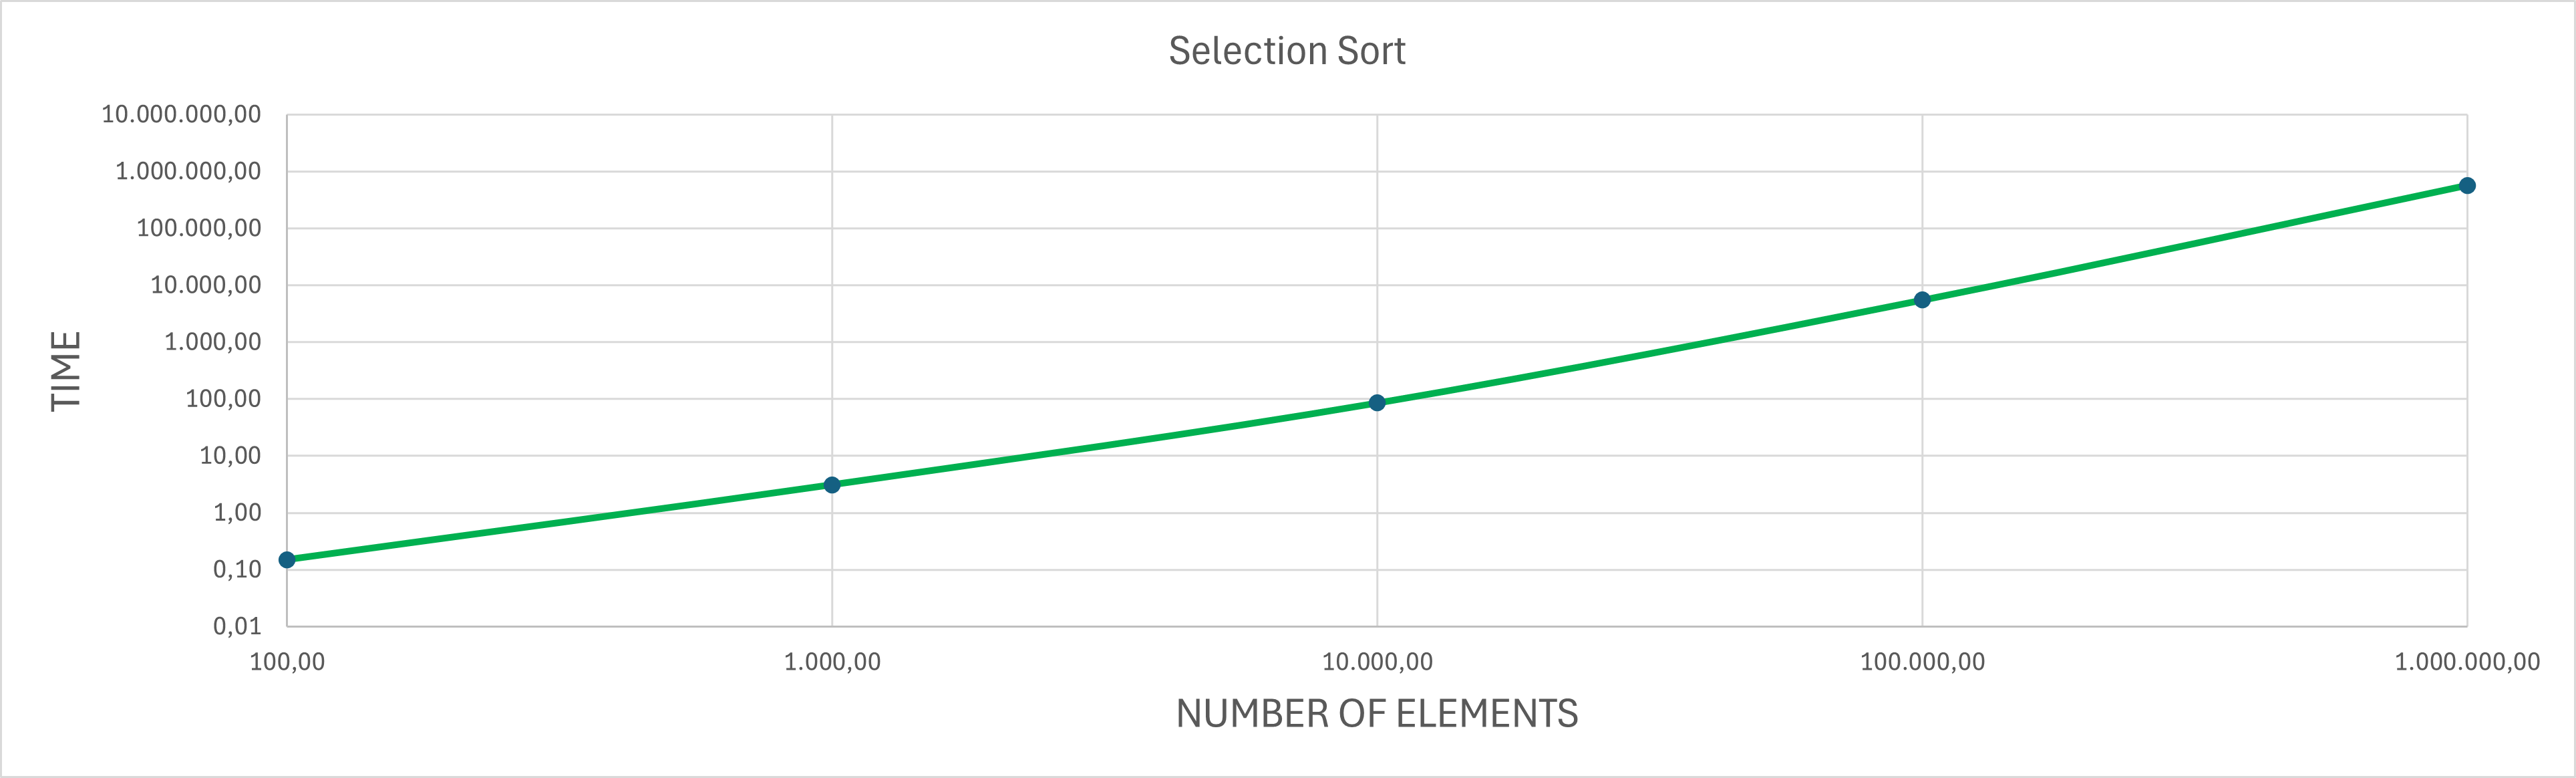

#### 2) **Bubble Sort:**

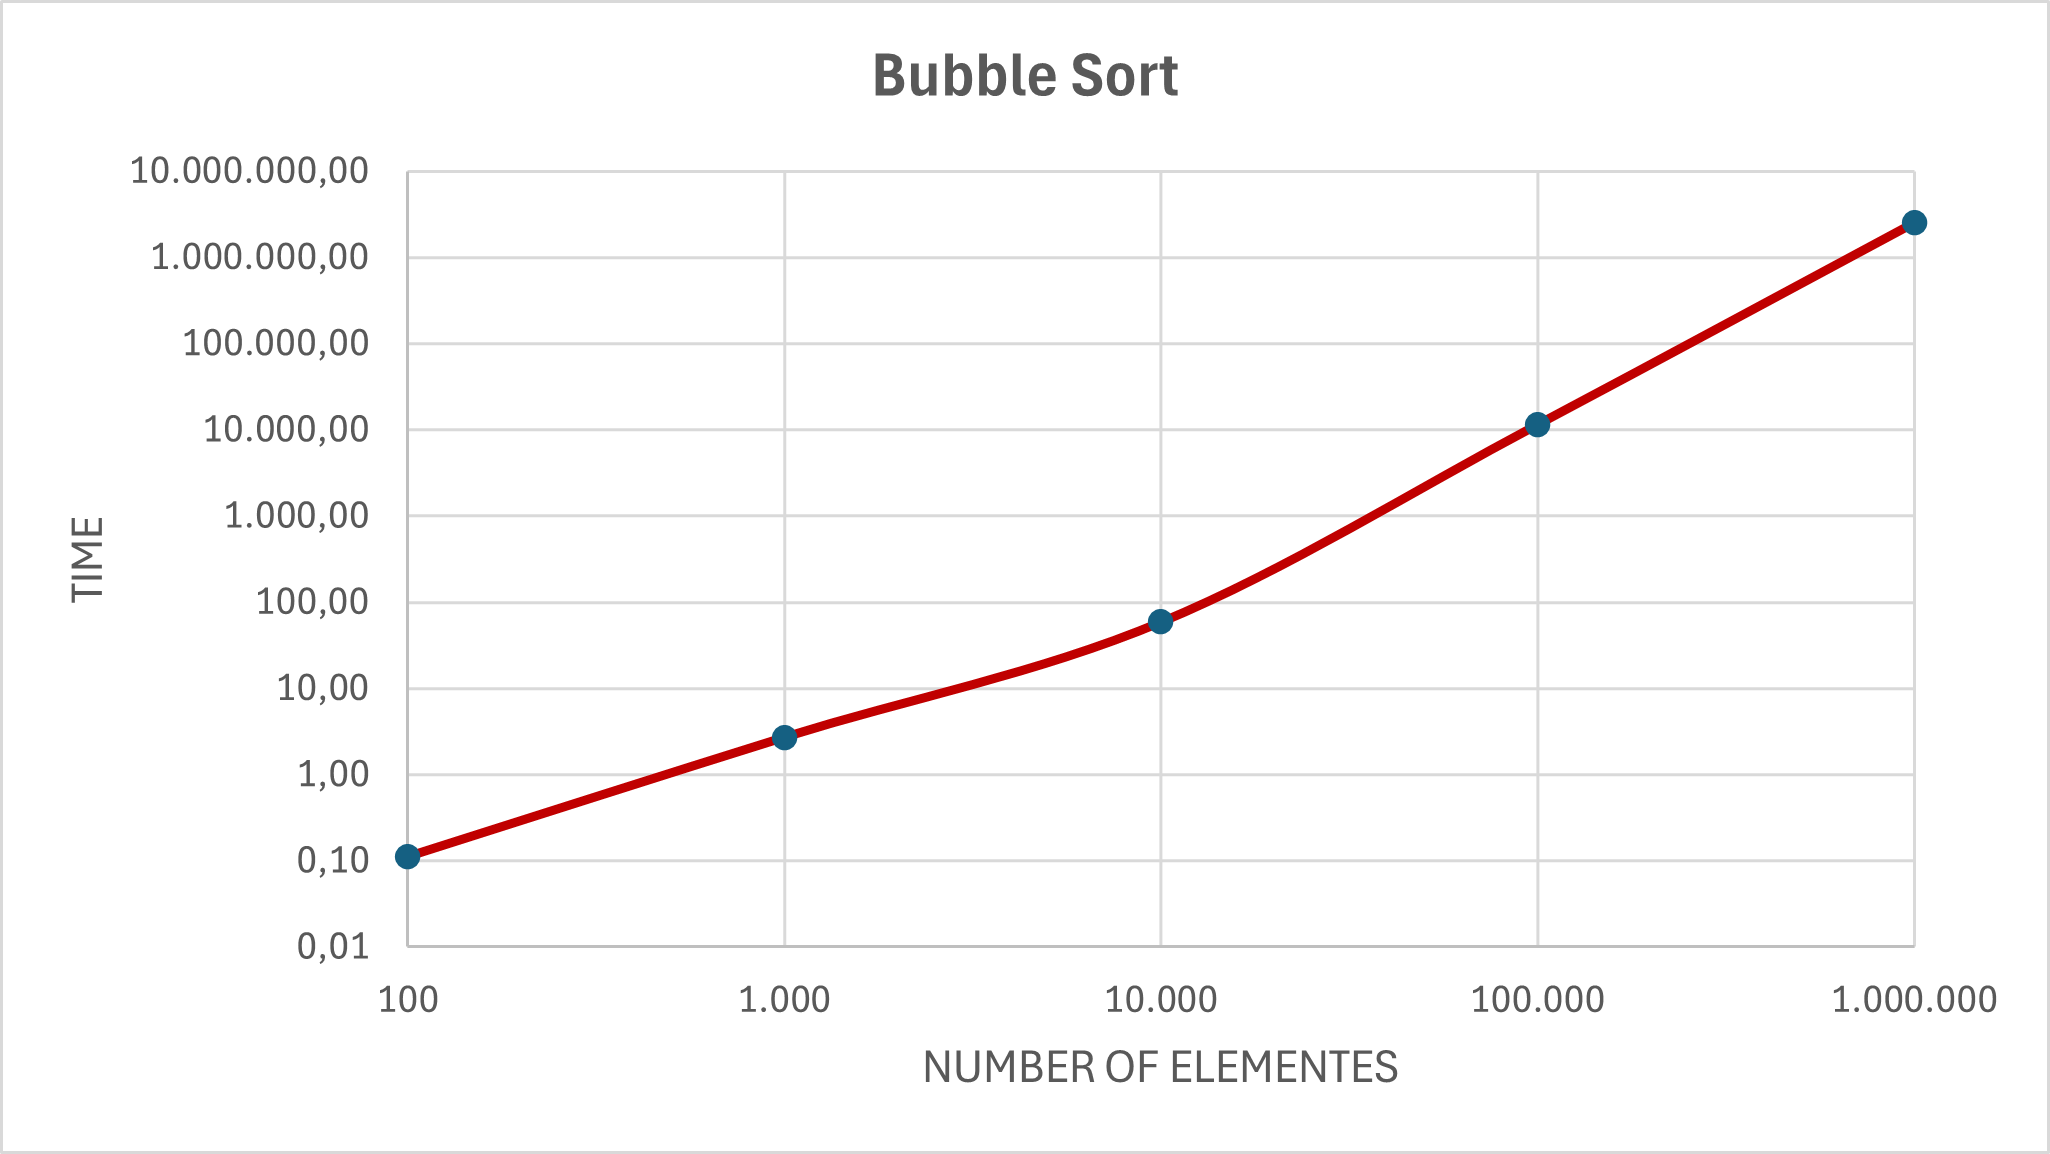

#### 3) **Shell Sort:**

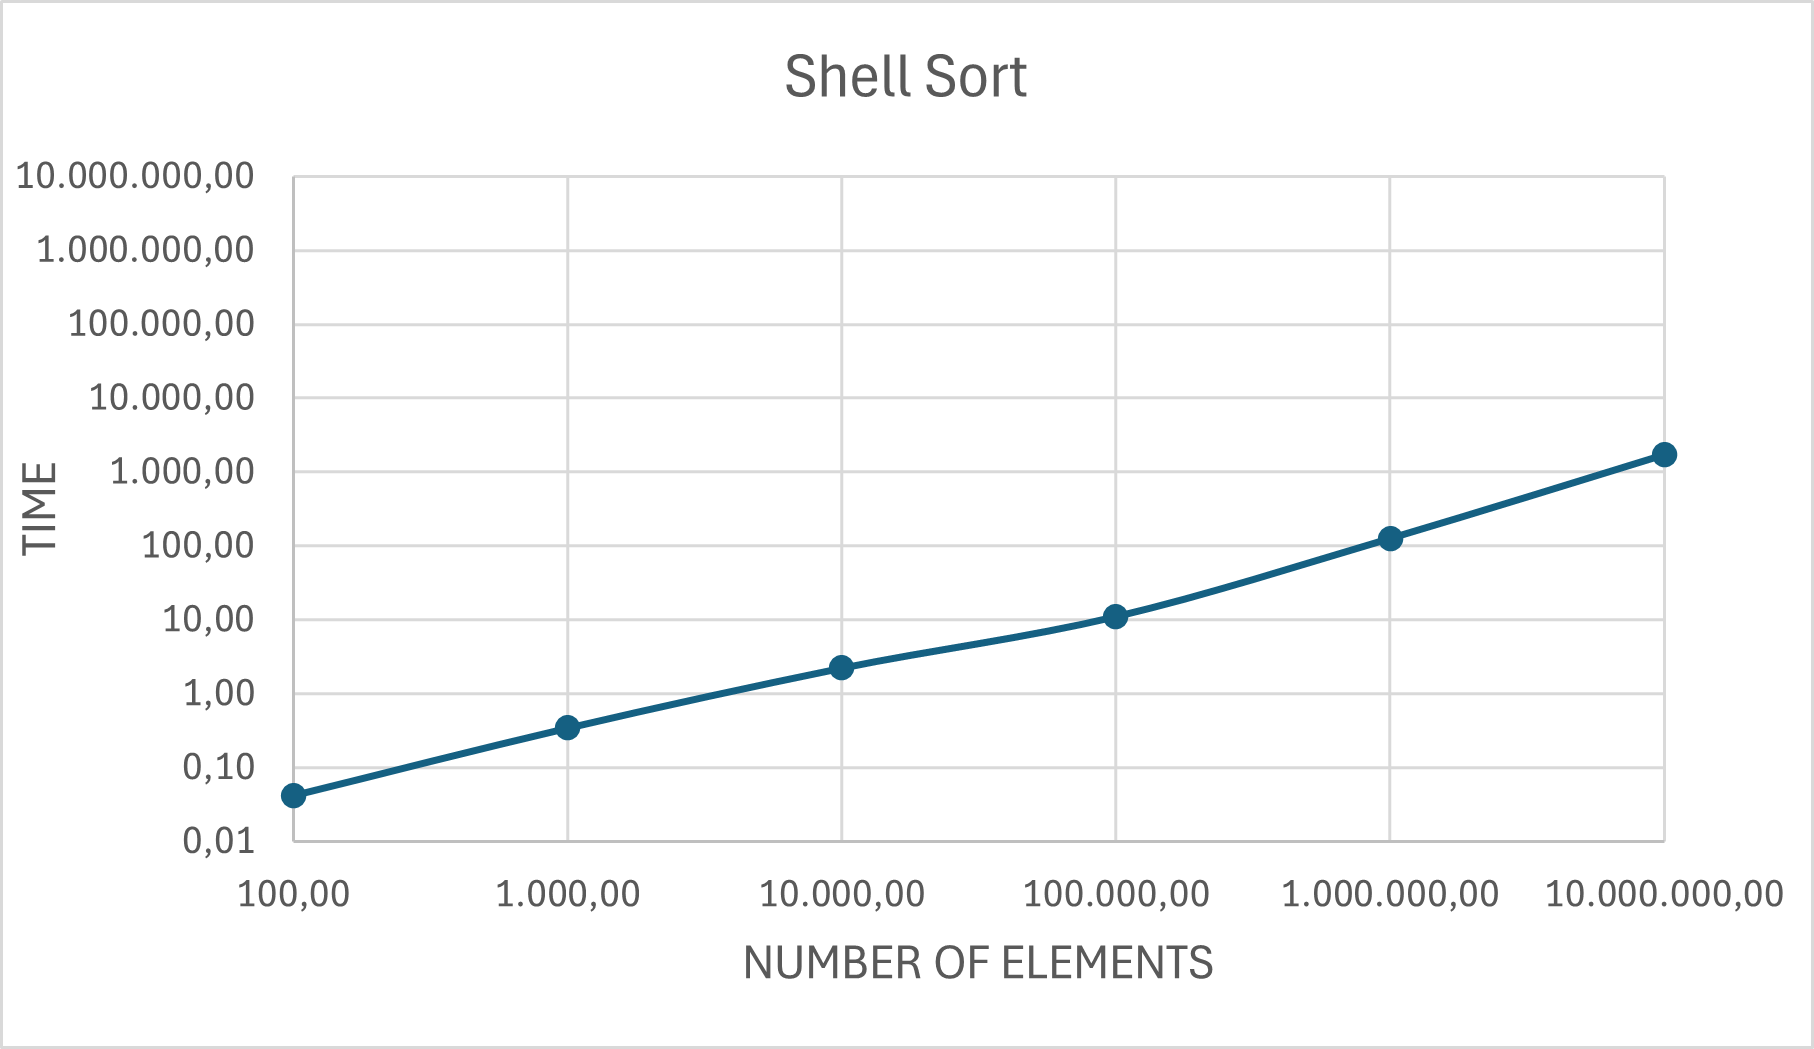

#### 4) **Quick Sort:**
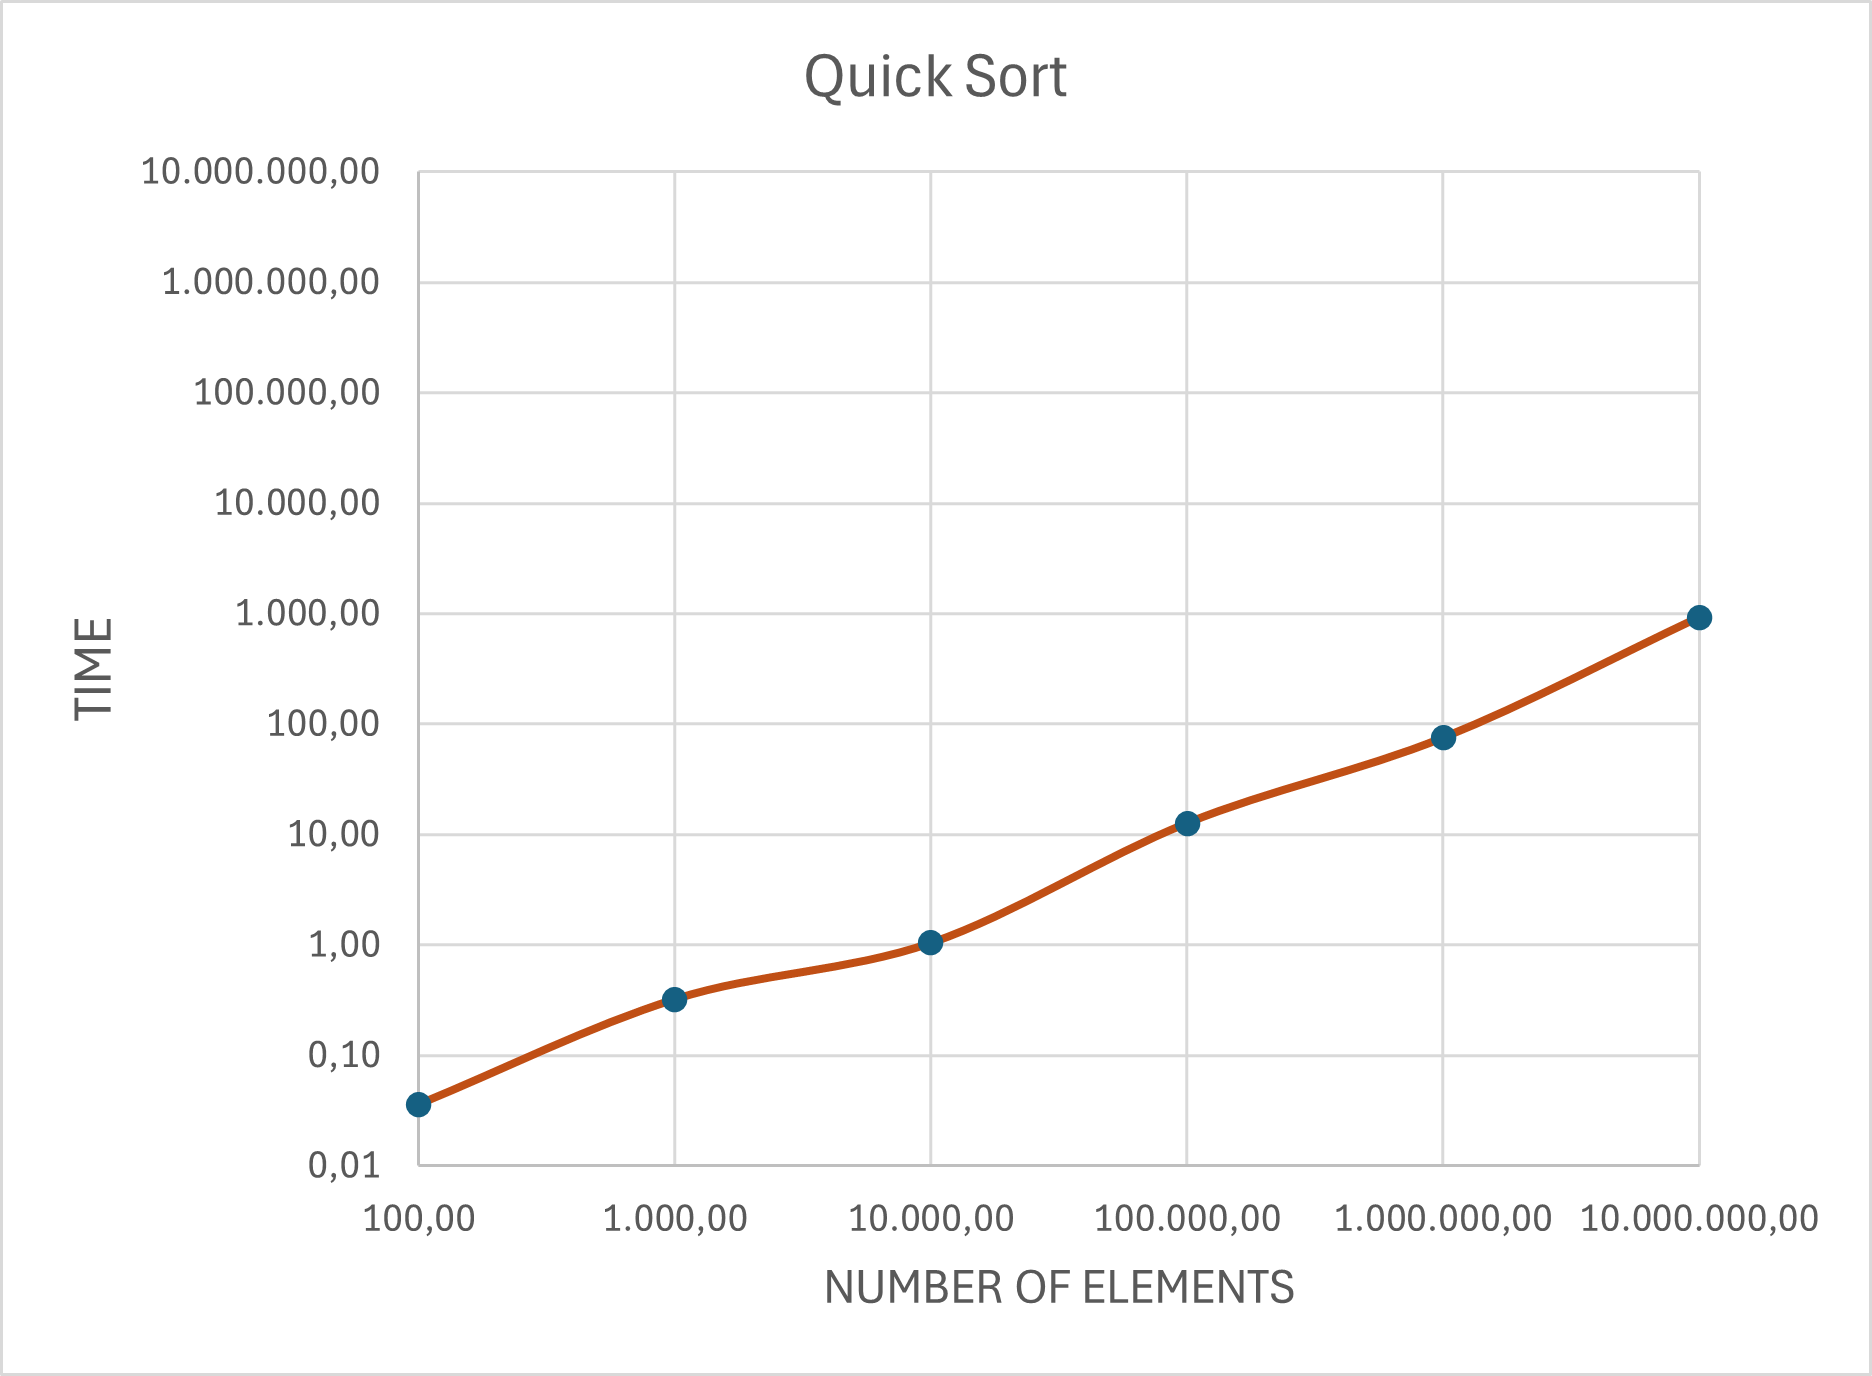

#### 5) **Merge Sort:**
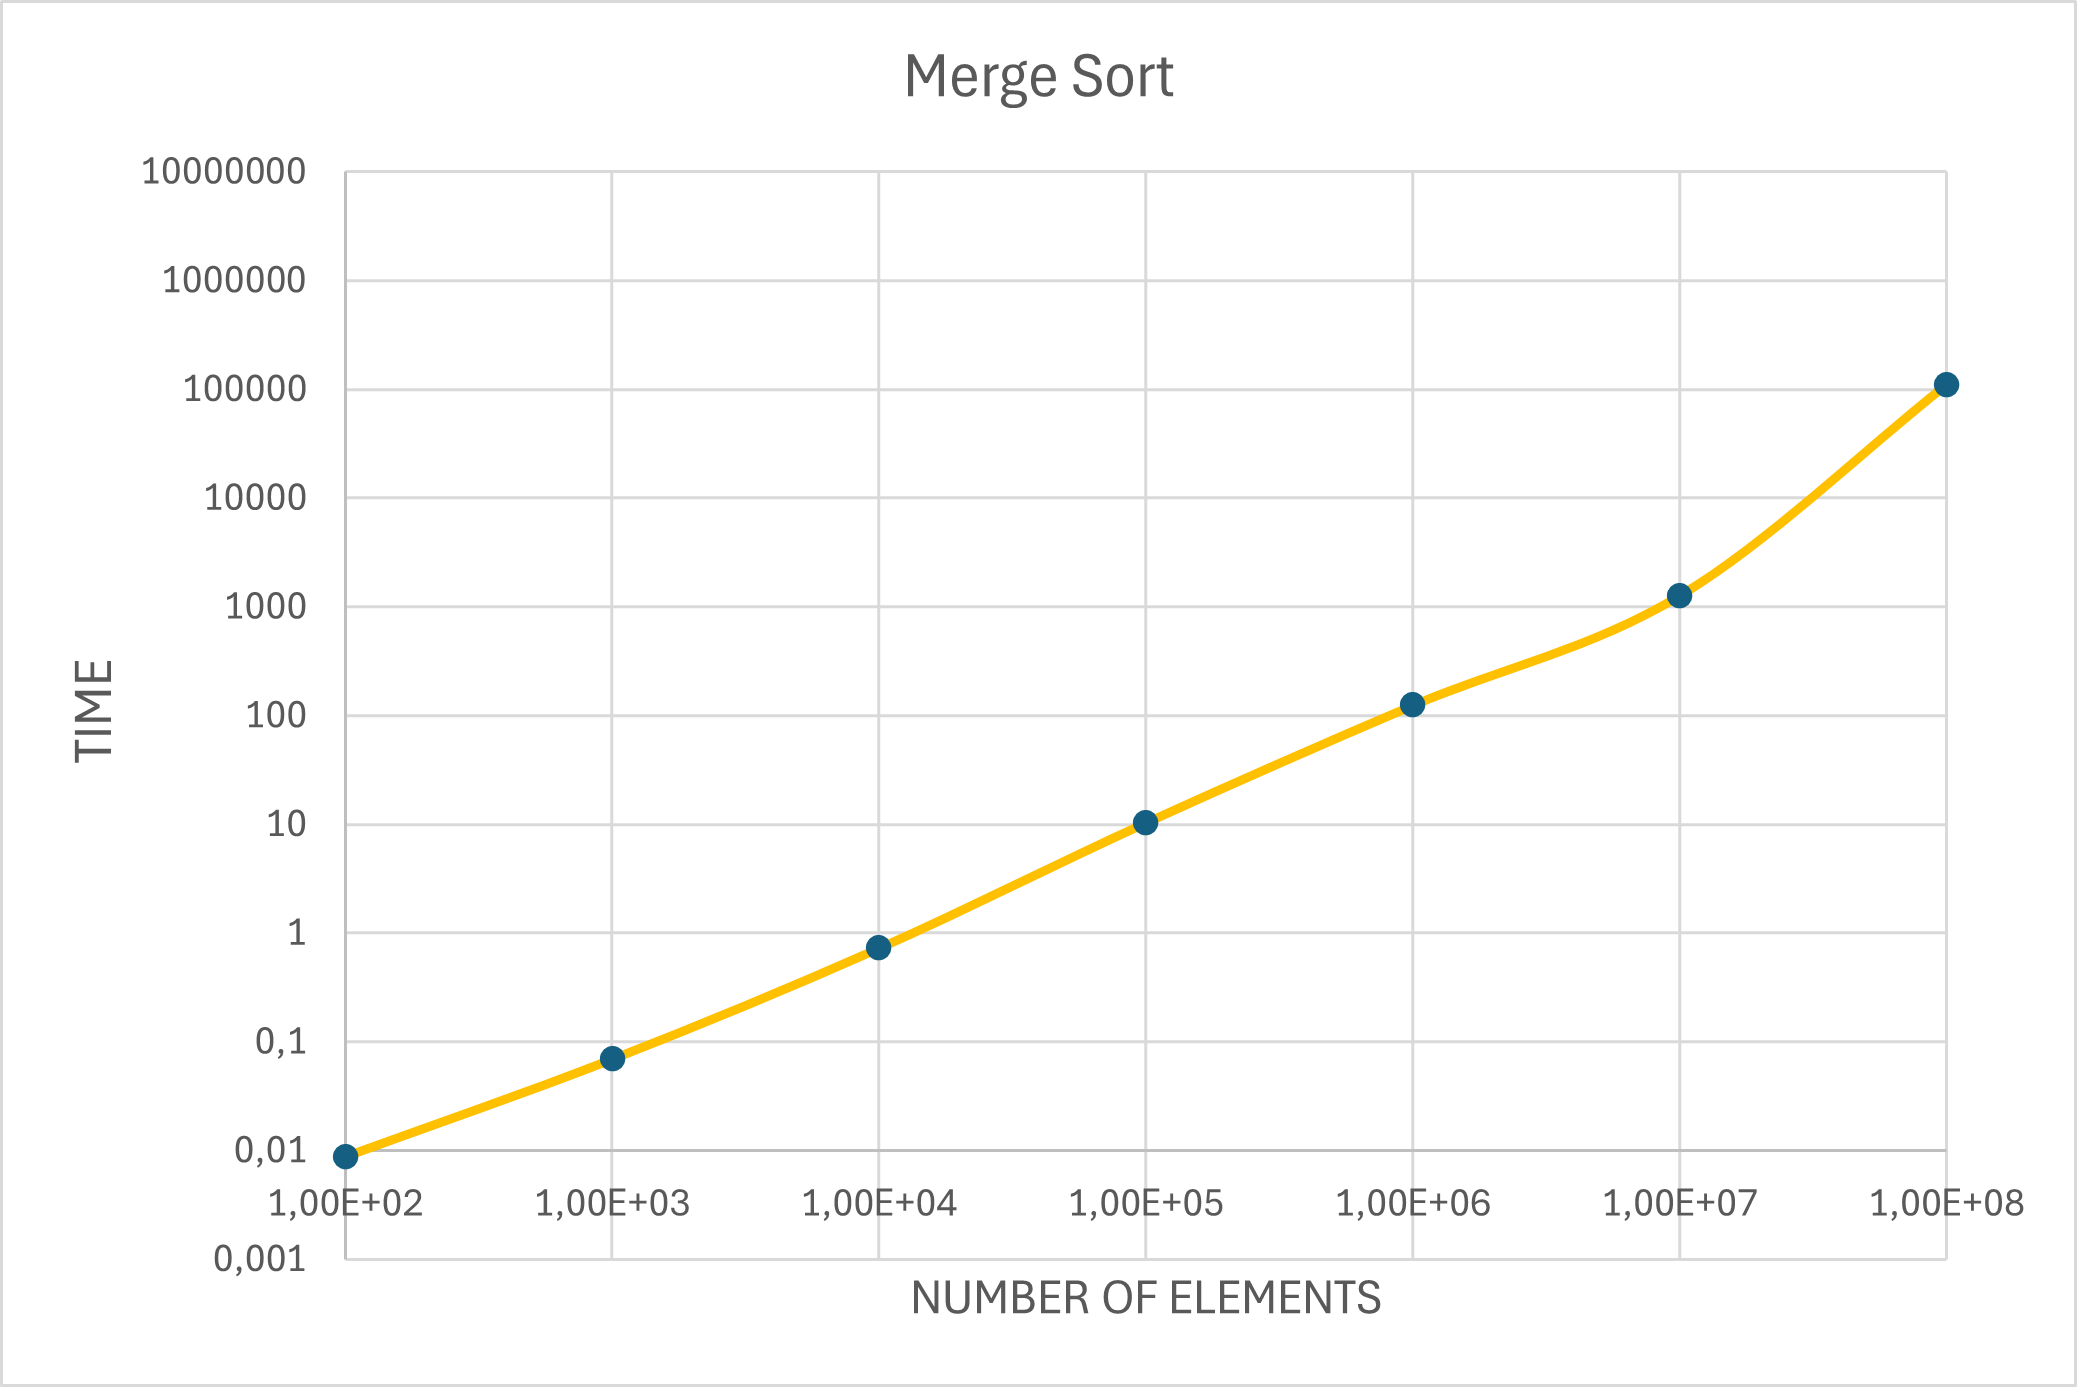

#### 6) **Vista general de los algoritmos de ordenamiento:**
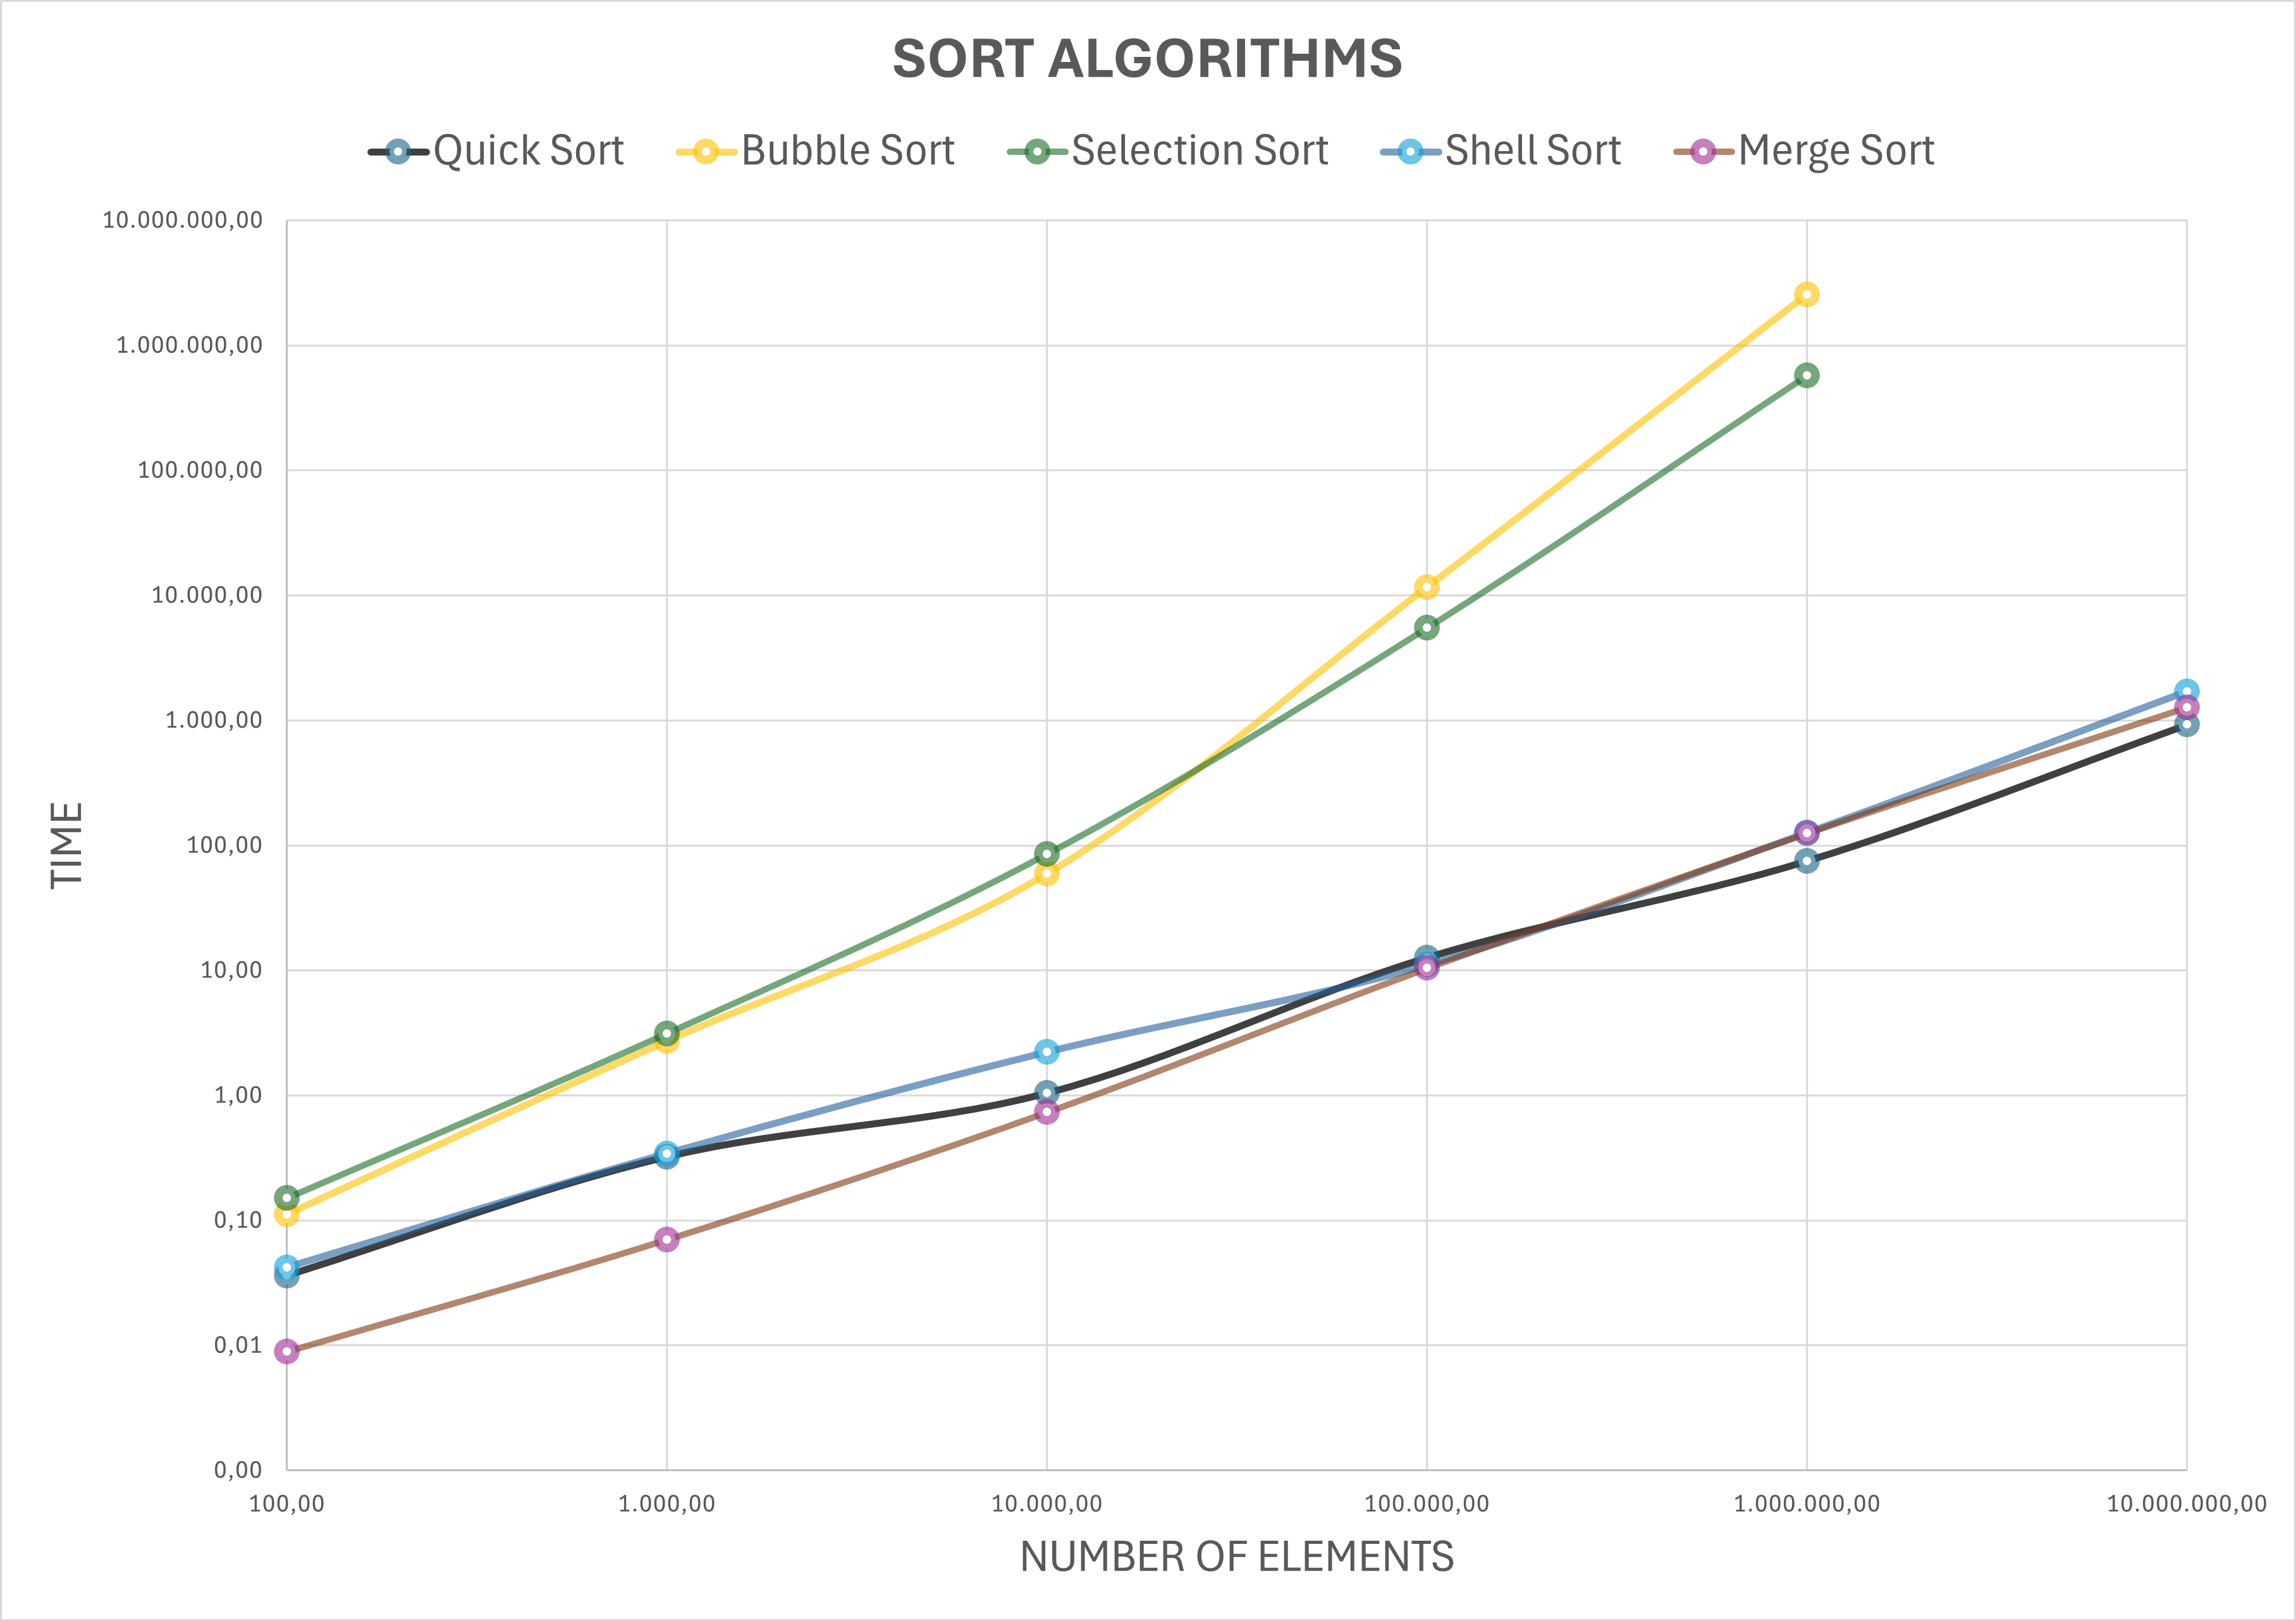

### **Algoritmos de búsqueda**:

#### 1) **Búsqueda Secuencial:**
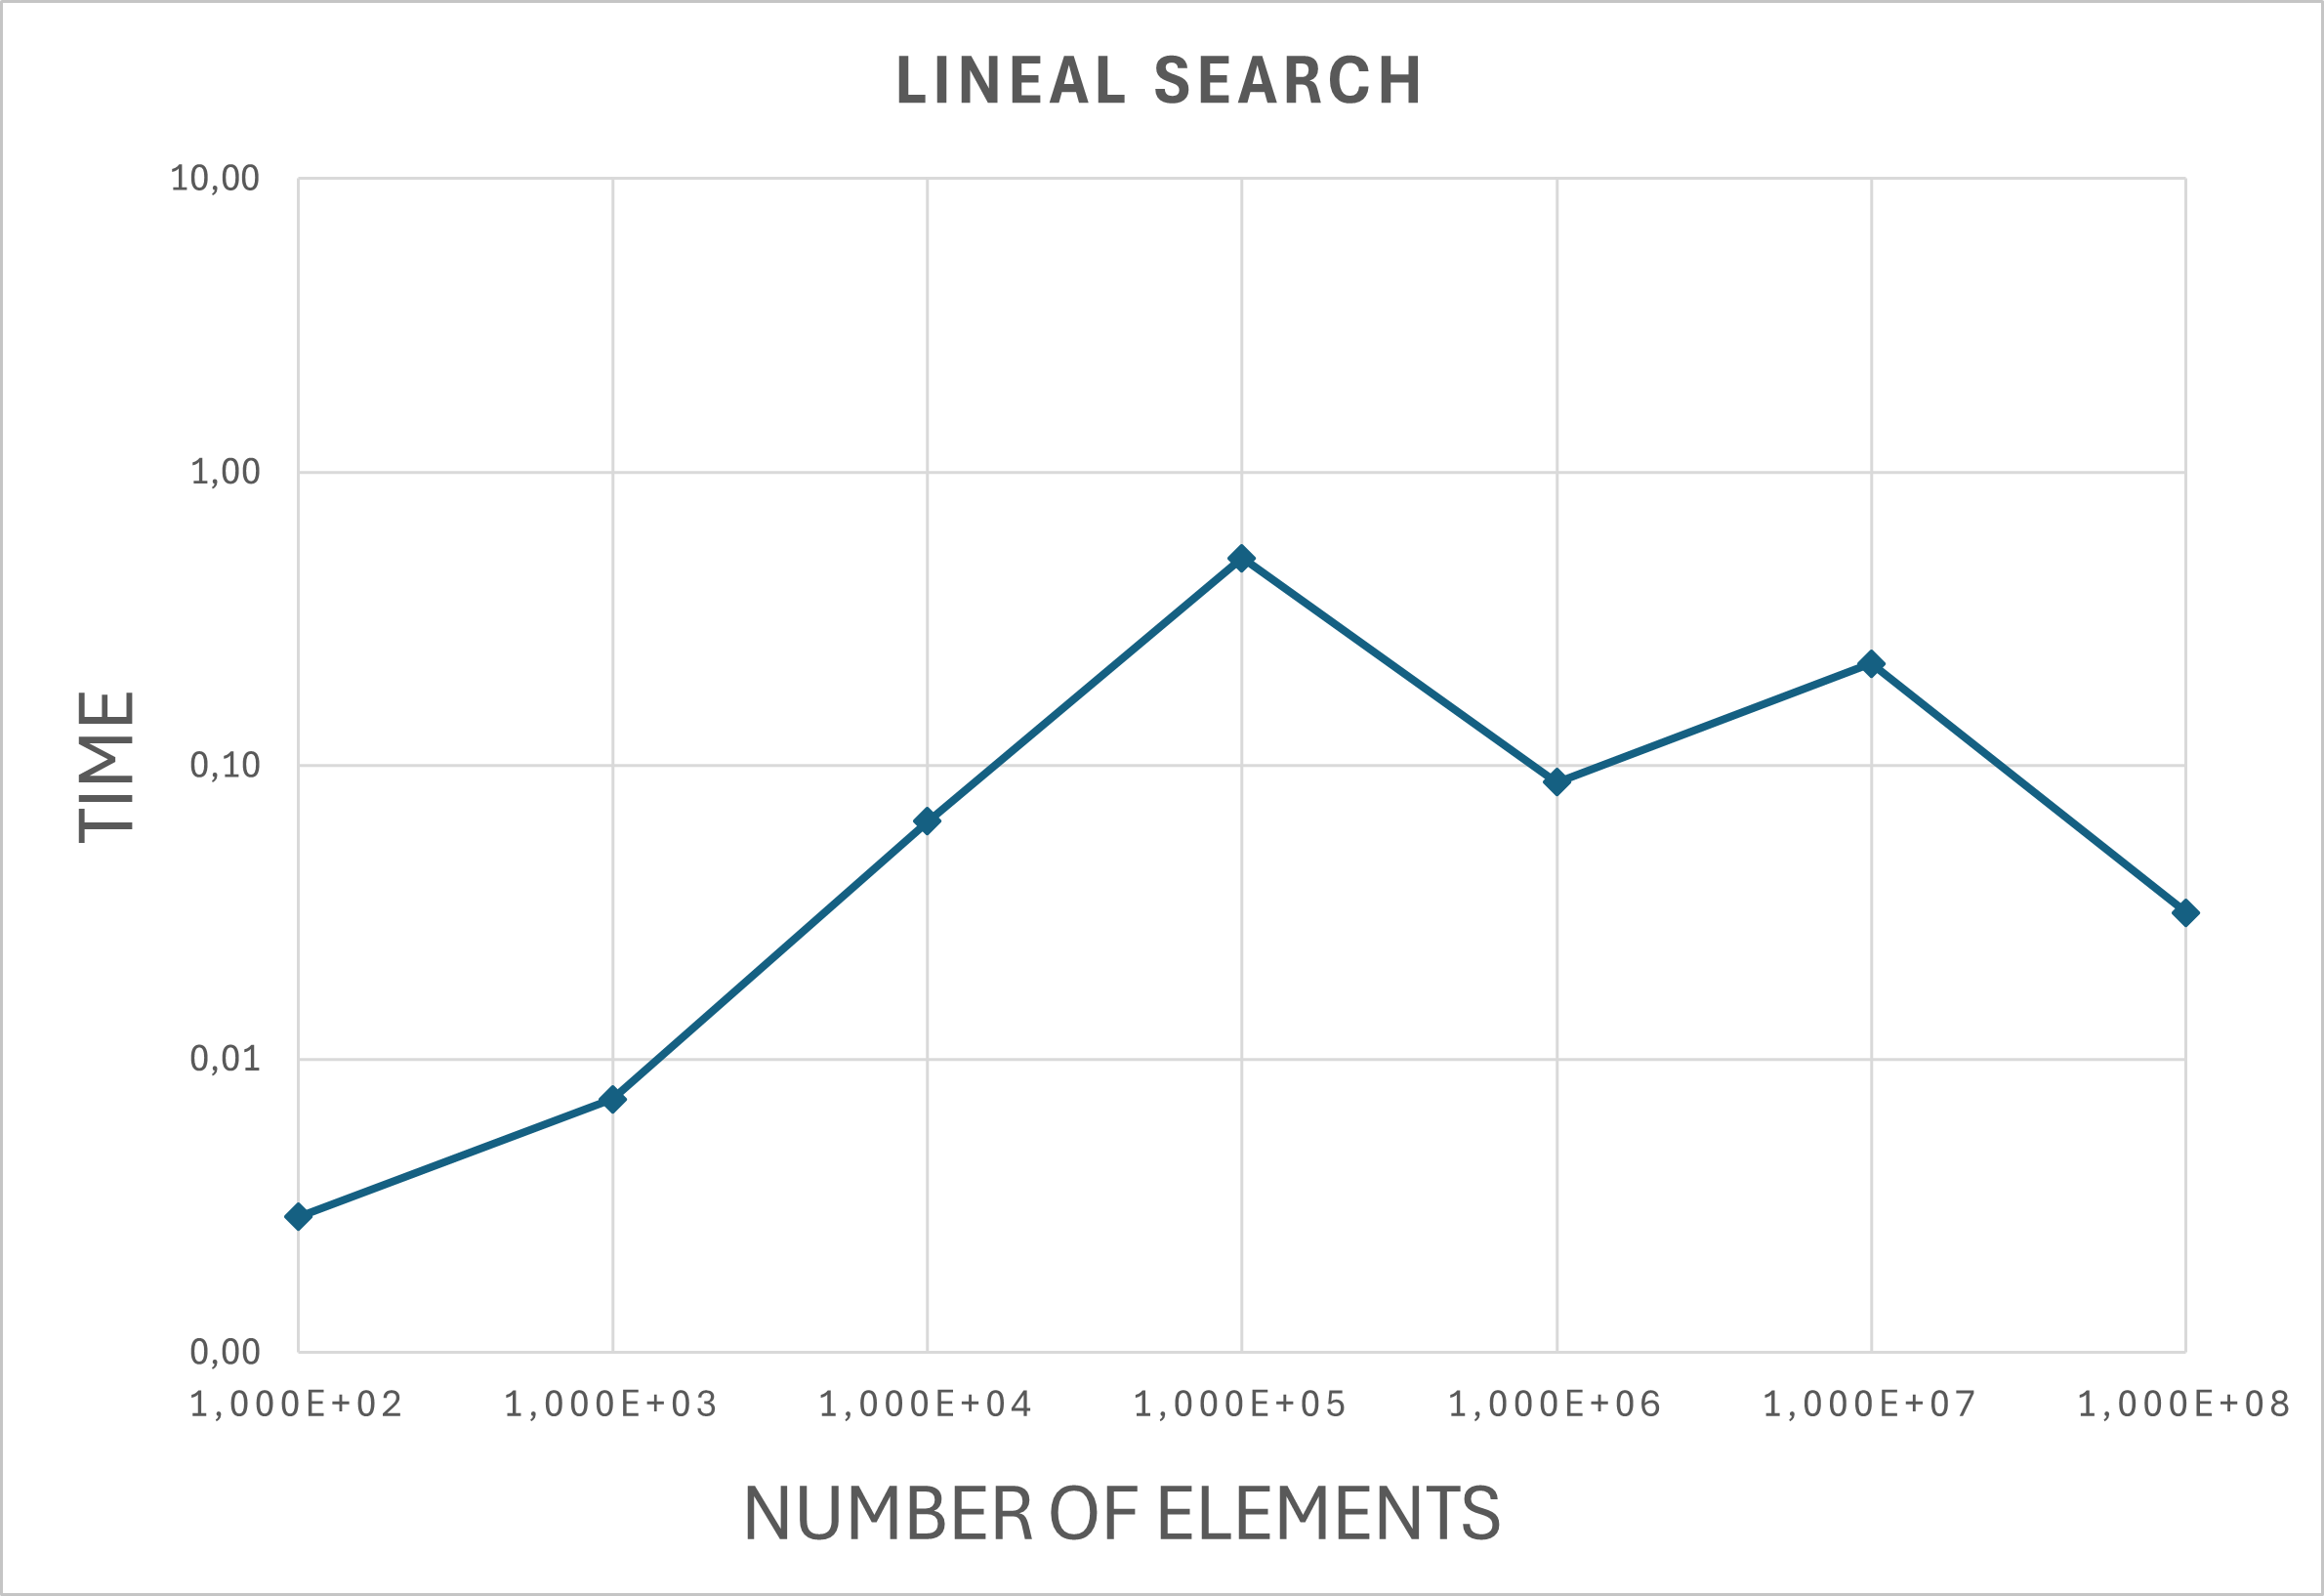

#### 2) **Búsqueda Binaria:**
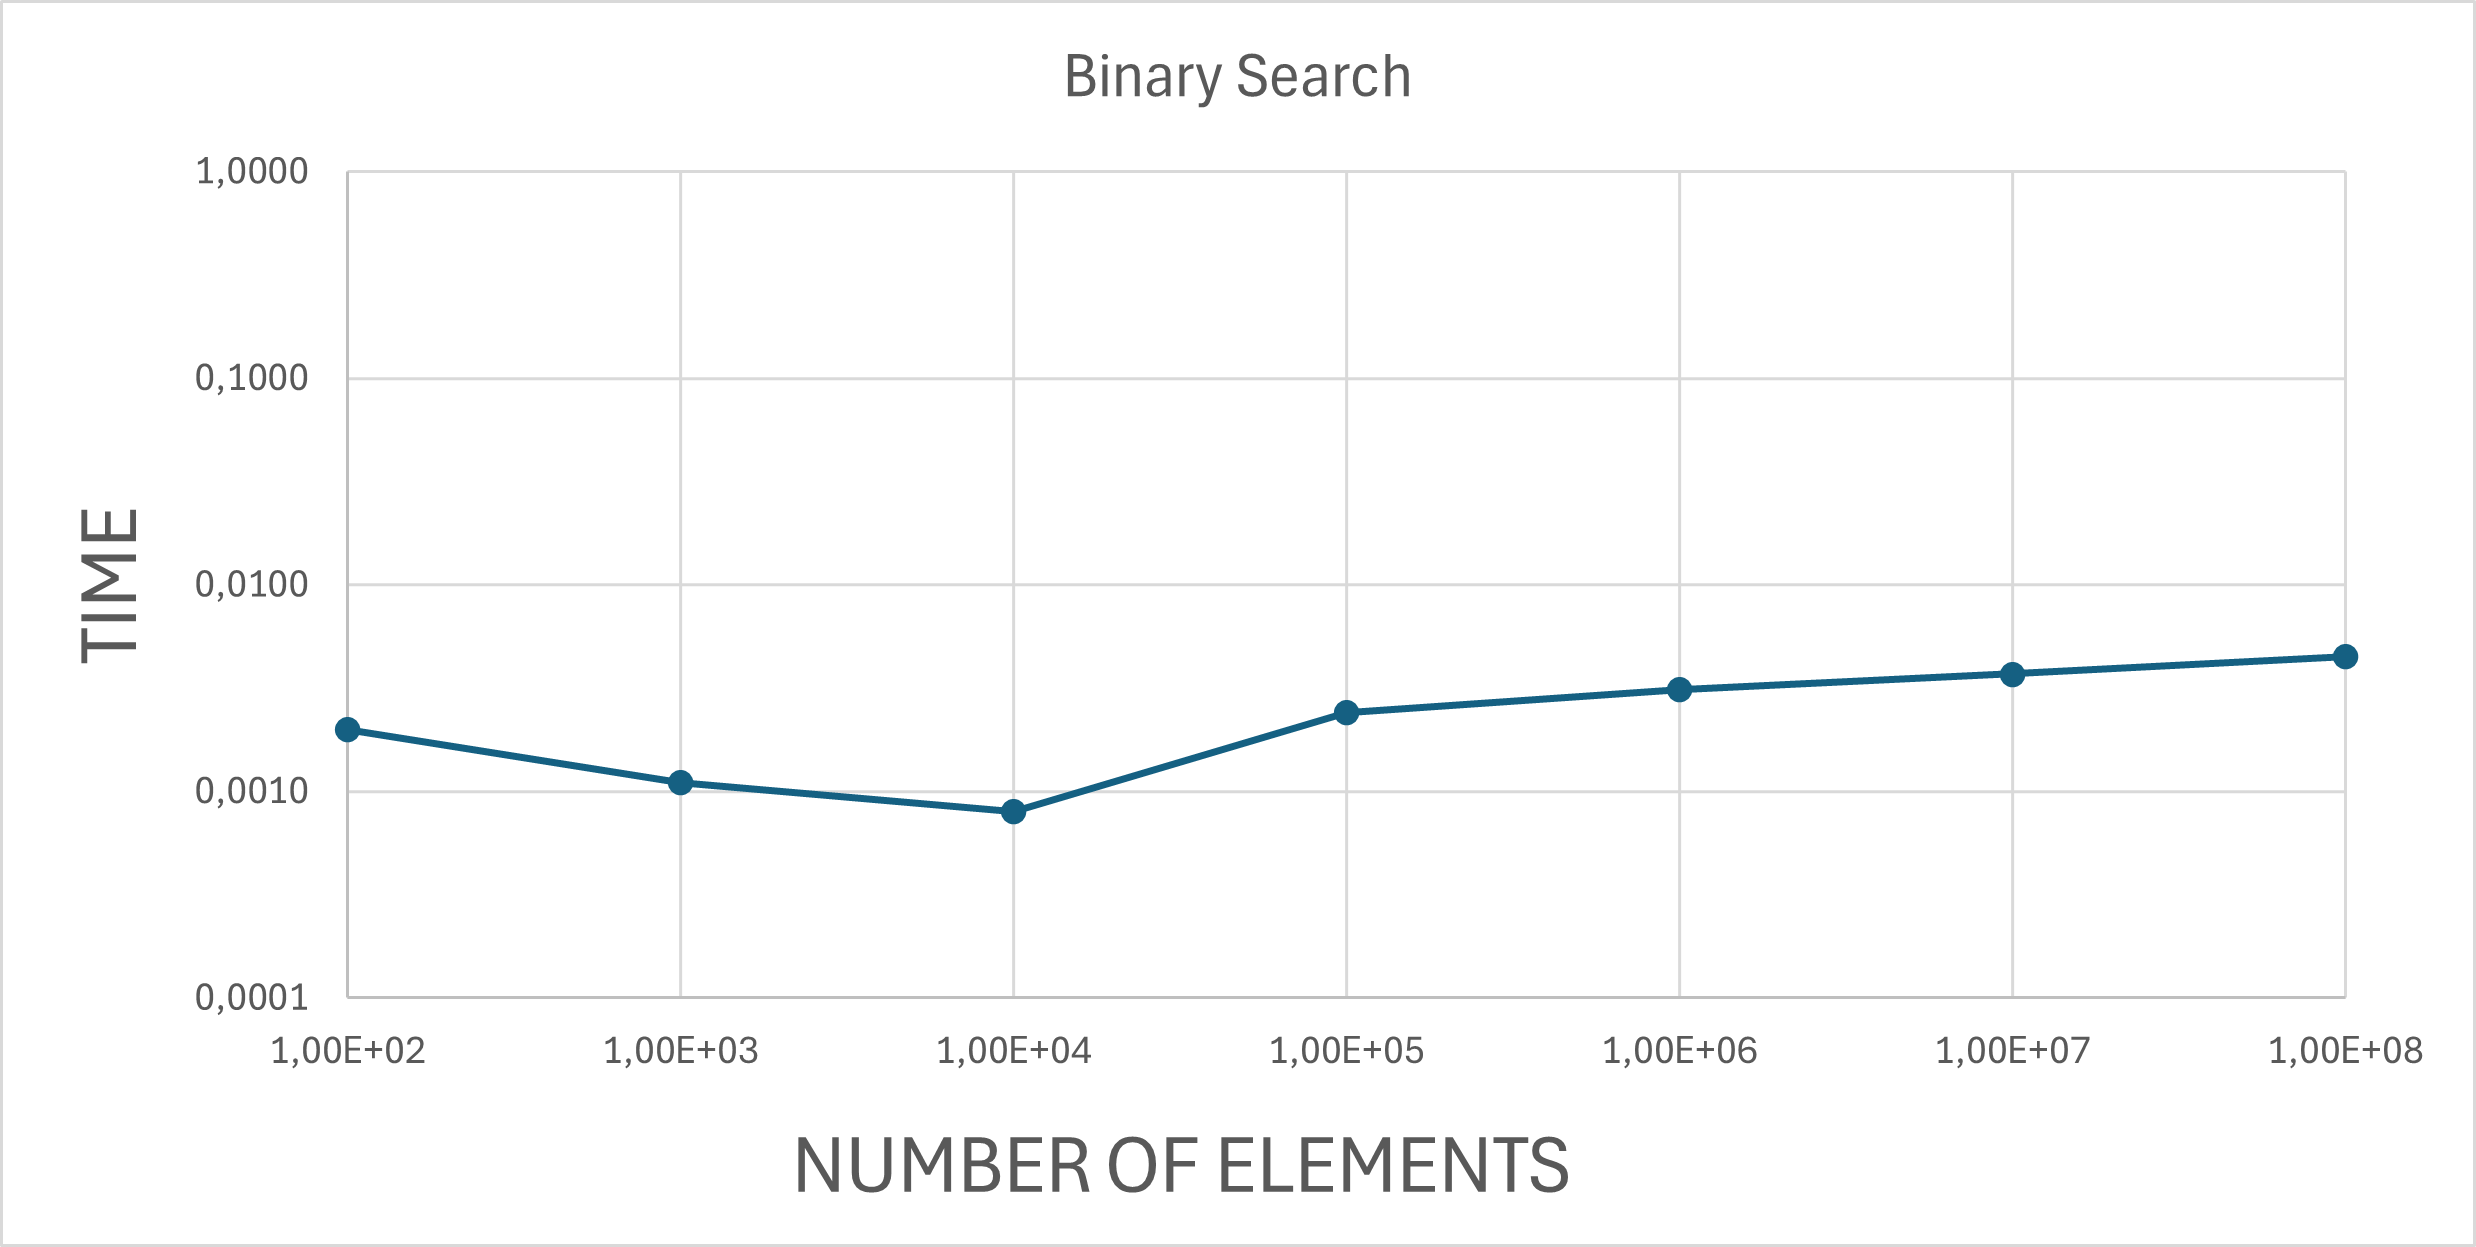

#### 3) **Vista general algoritmos de búsqueda:**
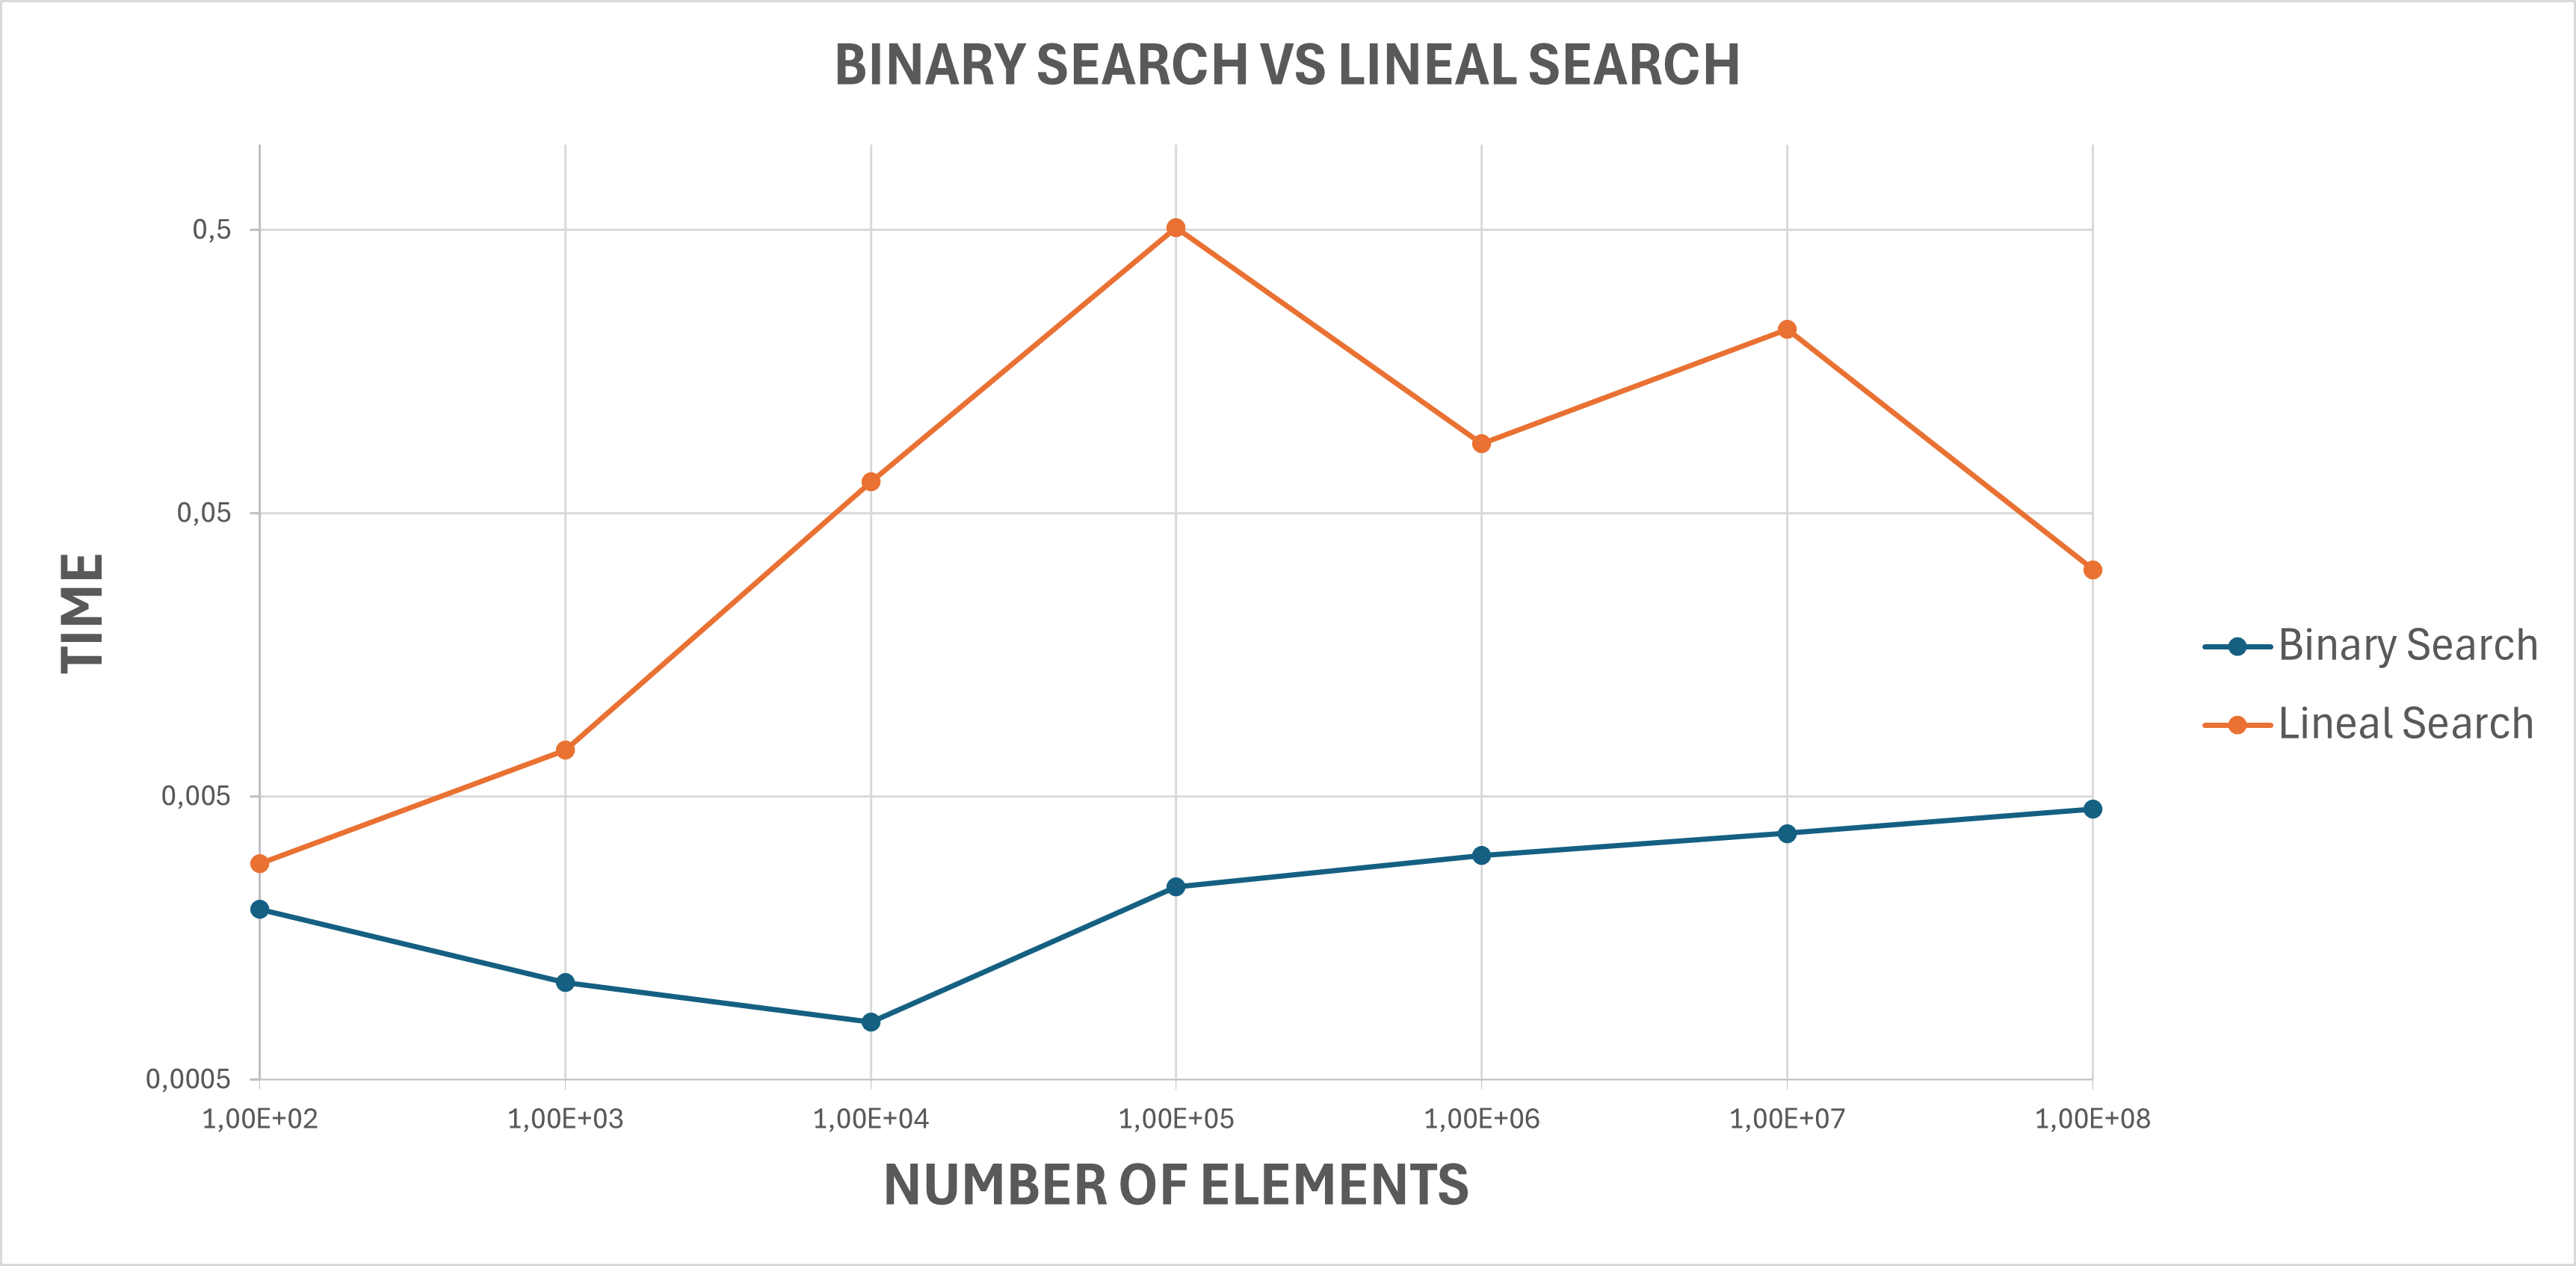